In [106]:
import json
import numpy as np
import pandas as pd
import graphviz

### Business Data

In [107]:
# load and preview the data
business_data = []
with open('business_sample_cleveland.json') as f:
    for line in f:
        business_data.append(json.loads(line))
business_df = pd.DataFrame.from_dict(business_data)
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,2128 Warrensville Ctr Rd,{'BusinessAcceptsCreditCards': True},jqp5TibmgJZVFKHTp3XfqQ,"[Car Wash, Automotive, Auto Detailing]",Cleveland,"{'Monday': '8:30-18:00', 'Tuesday': '8:30-18:0...",1,41.501820,-81.536776,Alpaul Automobile Wash,,44121,25,3.0,OH
1,3710 Payne Ave,"{'BusinessParking': {'garage': False, 'street'...",1cLXGXThDYZ5WK_KpBLtkw,"[Food, Bakeries, Coffee & Tea]",Cleveland,"{'Monday': '9:00-20:00', 'Friday': '9:00-20:00...",1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,44114,162,4.0,OH
2,13181 Cedar Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",Pawavw9U8rjxWVPU-RB7LA,"[Chinese, Restaurants]",Cleveland,"{'Monday': '11:30-21:30', 'Tuesday': '11:30-21...",1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,44118,22,3.5,OH
3,,{},2bGCupC5mfHmEaor4pZaqg,"[Home Services, Home Cleaning, Local Services,...",Cleveland,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,41.376464,-81.767764,Clean Machine,,44130,3,4.5,OH
4,1 American Rd,"{'BusinessAcceptsCreditCards': True, 'Restaura...",Q7Xw5YbS4wN7sdqZRsq4vQ,"[Event Planning & Services, Cards & Stationery...",Cleveland,{},1,41.437500,-81.763626,Cardstore,Brooklyn,44144,8,2.5,OH


In [108]:
# "name" column name is ambiguous with df.name - change it
business_df = business_df.rename(columns = {'name': 'BusinessName'})

In [109]:
type(business_df.categories[0])

list

In [110]:
one_data = business_df['categories'].str.join('|').str.get_dummies()
business_df = business_df.merge(one_data, left_index=True, right_index=True)
business_df.drop(['categories'], axis=1, inplace=True)
business_df.head()

,address,attributes,business_id,city,hours,is_open,latitude,longitude,BusinessName,neighborhood,...,Wine & Spirits,Wine Bars,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
0,2128 Warrensville Ctr Rd,{'BusinessAcceptsCreditCards': True},jqp5TibmgJZVFKHTp3XfqQ,Cleveland,"{'Monday': '8:30-18:00', 'Tuesday': '8:30-18:0...",1,41.501820,-81.536776,Alpaul Automobile Wash,,...,0,0,0,0,0,0,0,0,0,0
1,3710 Payne Ave,"{'BusinessParking': {'garage': False, 'street'...",1cLXGXThDYZ5WK_KpBLtkw,Cleveland,"{'Monday': '9:00-20:00', 'Friday': '9:00-20:00...",1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,...,0,0,0,0,0,0,0,0,0,0
2,13181 Cedar Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",Pawavw9U8rjxWVPU-RB7LA,Cleveland,"{'Monday': '11:30-21:30', 'Tuesday': '11:30-21...",1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,...,0,0,0,0,0,0,0,0,0,0
3,,{},2bGCupC5mfHmEaor4pZaqg,Cleveland,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,41.376464,-81.767764,Clean Machine,,...,0,0,0,0,0,0,0,0,0,0
4,1 American Rd,"{'BusinessAcceptsCreditCards': True, 'Restaura...",Q7Xw5YbS4wN7sdqZRsq4vQ,Cleveland,{},1,41.437500,-81.763626,Cardstore,Brooklyn,...,0,0,0,0,0,0,0,0,0,0


In [111]:
business_df['attributes'].head()

0                 {'BusinessAcceptsCreditCards': True}
1    {'BusinessParking': {'garage': False, 'street'...
2    {'GoodForMeal': {'dessert': False, 'latenight'...
3                                                   {}
4    {'BusinessAcceptsCreditCards': True, 'Restaura...
Name: attributes, dtype: object

In [112]:
business_df = business_df.join(pd.DataFrame(business_df['attributes'].to_dict()).T)
# further split sub-attributes into their own columns
cols_to_split = ['BusinessParking', 'Ambience', 'BestNights', 'GoodForMeal', 'HairSpecializesIn', 'Music']
for col_to_split in cols_to_split:
    new_df = pd.DataFrame(business_df[col_to_split].to_dict()).T
    new_df.columns = [col_to_split + '_' + str(col) for col in new_df.columns]
    business_df = business_df.join(new_df)

business_df.drop(['attributes'] + cols_to_split, axis=1, inplace=True)
business_df.head()

,address,business_id,city,hours,is_open,latitude,longitude,BusinessName,neighborhood,postal_code,...,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,Music_dj,Music_background_music,Music_no_music,Music_jukebox,Music_live,Music_video,Music_karaoke
0,2128 Warrensville Ctr Rd,jqp5TibmgJZVFKHTp3XfqQ,Cleveland,"{'Monday': '8:30-18:00', 'Tuesday': '8:30-18:0...",1,41.501820,-81.536776,Alpaul Automobile Wash,,44121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3710 Payne Ave,1cLXGXThDYZ5WK_KpBLtkw,Cleveland,"{'Monday': '9:00-20:00', 'Friday': '9:00-20:00...",1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,44114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13181 Cedar Rd,Pawavw9U8rjxWVPU-RB7LA,Cleveland,"{'Monday': '11:30-21:30', 'Tuesday': '11:30-21...",1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,44118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,2bGCupC5mfHmEaor4pZaqg,Cleveland,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,41.376464,-81.767764,Clean Machine,,44130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 American Rd,Q7Xw5YbS4wN7sdqZRsq4vQ,Cleveland,{},1,41.437500,-81.763626,Cardstore,Brooklyn,44144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# columns with non-boolean categorical values:
cols_to_split = ['AgesAllowed', 'Alcohol', 'BYOBCorkage', 'NoiseLevel', 'RestaurantsAttire', 'Smoking', 'WiFi']
new_cat = pd.concat([pd.get_dummies(business_df[col], prefix=col, prefix_sep='_') for col in cols_to_split], axis=1)
# keep all columns (not n-1) because 0's for all of them indicates that the data was missing (useful info)
business_df = pd.concat([business_df, new_cat], axis=1)
business_df.drop(cols_to_split, inplace=True, axis=1)
business_df.head()

,address,business_id,city,hours,is_open,latitude,longitude,BusinessName,neighborhood,postal_code,...,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid
0,2128 Warrensville Ctr Rd,jqp5TibmgJZVFKHTp3XfqQ,Cleveland,"{'Monday': '8:30-18:00', 'Tuesday': '8:30-18:0...",1,41.501820,-81.536776,Alpaul Automobile Wash,,44121,...,0,0,0,0,0,0,0,0,0,0
1,3710 Payne Ave,1cLXGXThDYZ5WK_KpBLtkw,Cleveland,"{'Monday': '9:00-20:00', 'Friday': '9:00-20:00...",1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,44114,...,0,0,0,0,0,0,0,1,0,0
2,13181 Cedar Rd,Pawavw9U8rjxWVPU-RB7LA,Cleveland,"{'Monday': '11:30-21:30', 'Tuesday': '11:30-21...",1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,44118,...,0,1,0,0,0,0,0,0,1,0
3,,2bGCupC5mfHmEaor4pZaqg,Cleveland,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,41.376464,-81.767764,Clean Machine,,44130,...,0,0,0,0,0,0,0,0,0,0
4,1 American Rd,Q7Xw5YbS4wN7sdqZRsq4vQ,Cleveland,{},1,41.437500,-81.763626,Cardstore,Brooklyn,44144,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# convert true/false columns to 0/.5/1 for false/missing/true
print(business_df['BusinessAcceptsCreditCards'].head(10))
business_df = business_df.fillna(0.5).apply(pd.to_numeric, errors='ignore')  # can narrow with .iloc[:,648:722] if necessary
business_df['BusinessAcceptsCreditCards'].head(10)

0     True
1     True
2    False
3      NaN
4     True
5     True
6     True
7      NaN
8     True
9     True
Name: BusinessAcceptsCreditCards, dtype: object


0    1.0
1    1.0
2    0.0
3    0.5
4    1.0
5    1.0
6    1.0
7    0.5
8    1.0
9    1.0
Name: BusinessAcceptsCreditCards, dtype: float64

In [115]:
# deal with missing values in postal code
print(business_df['postal_code'].isnull().sum())
business_df['postal_code'] = business_df['postal_code'].fillna(0)
print(business_df['postal_code'].isnull().sum())

13
0


In [116]:
# check that all nulls are removed
business_df.isnull().sum().sum()

0

### CHECKING DATA

In [117]:
import json
import pandas as pd

In [118]:
checkin_data = []
with open('checkin_sample_cleveland.json') as f:
    for line in f:
        checkin_data.append(json.loads(line))
checkin_df = pd.DataFrame.from_dict(checkin_data)
checkin_df.head()

,business_id,time
0,Zn3GV2xa9a-8bHjUM-2sow,"{'Thursday': {'23:00': 1, '21:00': 1, '0:00': ..."
1,lia867Aug7wdfpo5t86W3Q,{'Friday': {'0:00': 1}}
2,8U6EmwNaeTnhKbhBgIZPGQ,"{'Monday': {'5:00': 1, '4:00': 3, '1:00': 2}, ..."
3,KsYAGLP4yC7FbfixaeCHsA,"{'Monday': {'14:00': 4, '22:00': 4, '12:00': 1..."
4,bo3z3-WUNblcRKRrWqeTAg,"{'Monday': {'19:00': 10, '14:00': 3, '17:00': ..."


In [119]:
type(checkin_df['time'][0])

dict

In [120]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
one_data = pd.DataFrame(mlb.fit_transform(checkin_df.pop('time')),columns=mlb.classes_,index=checkin_df.index)

one_data.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,1,0,1,0,0
1,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1


In [121]:
checkin_df = checkin_df.merge(one_data,left_index=True, right_index=True)
#checkin_df.drop(['time'], axis=1, inplace=True)
business_df = business_df.merge(checkin_df, left_on='business_id', right_on='business_id', how='left')
business_df.head()

,address,business_id,city,hours,is_open,latitude,longitude,BusinessName,neighborhood,postal_code,...,WiFi_free,WiFi_no,WiFi_paid,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2128 Warrensville Ctr Rd,jqp5TibmgJZVFKHTp3XfqQ,Cleveland,"{'Monday': '8:30-18:00', 'Tuesday': '8:30-18:0...",1,41.501820,-81.536776,Alpaul Automobile Wash,,44121.0,...,0,0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,3710 Payne Ave,1cLXGXThDYZ5WK_KpBLtkw,Cleveland,"{'Monday': '9:00-20:00', 'Friday': '9:00-20:00...",1,41.509408,-81.662162,Koko Bakery,Goodrich Kirtland,44114.0,...,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,13181 Cedar Rd,Pawavw9U8rjxWVPU-RB7LA,Cleveland,"{'Monday': '11:30-21:30', 'Tuesday': '11:30-21...",1,41.501413,-81.565982,Richie Chan's Chinese Restaurant,,44118.0,...,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,,2bGCupC5mfHmEaor4pZaqg,Cleveland,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1,41.376464,-81.767764,Clean Machine,,44130.0,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1 American Rd,Q7Xw5YbS4wN7sdqZRsq4vQ,Cleveland,{},1,41.437500,-81.763626,Cardstore,Brooklyn,44144.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
business_df.iloc[:, 648:] = business_df.iloc[:, 648:].fillna(0)

In [123]:
basic_cols = business_df.columns[:13]
print(basic_cols)

category_cols = business_df.columns[13:648]
print (category_cols)

attribute_cols = business_df.columns[648:737]
print(attribute_cols)

checkin_cols = business_df.columns[737:]
print(checkin_cols)

attribute_checkin_cols = business_df.columns[648:]
#business_df.info(verbose=True, null_counts=True)

Index(['address', 'business_id', 'city', 'hours', 'is_open', 'latitude',
       'longitude', 'BusinessName', 'neighborhood', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')
Index(['Accessories', 'Active Life', 'Acupuncture', 'Adult', 'Adult Education',
       'Adult Entertainment', 'African', 'Air Duct Cleaning', 'Airlines',
       'Airport Lounges',
       ...
       'Wine & Spirits', 'Wine Bars', 'Wine Tasting Room', 'Wine Tours',
       'Wineries', 'Women's Clothing', 'Wraps', 'Yelp Events', 'Yoga', 'Zoos'],
      dtype='object', length=635)
Index(['BusinessAcceptsCreditCards', 'Caters', 'OutdoorSeating',
       'RestaurantsPriceRange2', 'BikeParking', 'RestaurantsDelivery',
       'RestaurantsTakeOut', 'WheelchairAccessible', 'HasTV', 'GoodForKids',
       'RestaurantsReservations', 'RestaurantsTableService',
       'RestaurantsGoodForGroups', 'GoodForDancing', 'BusinessAcceptsBitcoin',
       'HappyHour', 'DogsAllowed', 'CoatCheck', 'ByAppointmentOnl

### Exploring the data

In [124]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

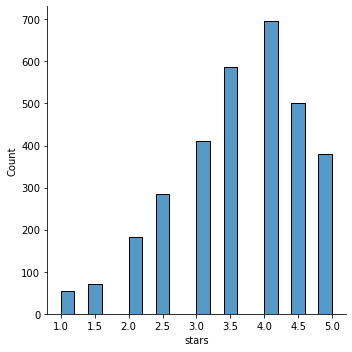

In [125]:
sns.displot(business_df['stars'], kde=False);

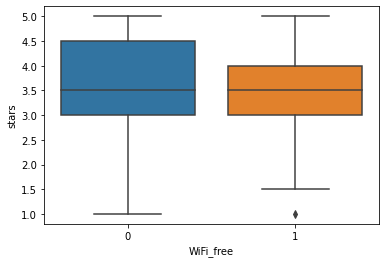

In [126]:
sns.boxplot(x='WiFi_free', y='stars', data=business_df);

In [127]:
# boxplot_df = pd.DataFrame([])
# for i, cat in enumerate(new_cat):
#     currgroup = business_df[business_df[cat] == 1]
#     if currgroup.stars.value_counts().sum() >= min_ratings:
#         if currgroup.stars.mean() >= upper_perc or currgroup.stars.mean() <= lower_perc:
#             stars_df = pd.DataFrame([])
#             stars_df['Stars'] = currgroup.stars
#             stars_df['Category'] = currgroup[cat].name
#             stars_df['Mean'] = currgroup.stars.mean()
#             boxplot_df = pd.concat([boxplot_df, stars_df])

# boxplot_df = boxplot_df.sort_values(['Mean']).reset_index(drop=True)

# fig, ax = plt.subplots()
# fig.set_size_inches(8, boxplot_df['Category'].nunique()/4)
# ax = sns.boxplot(x='Stars', y='Category', data=boxplot_df)

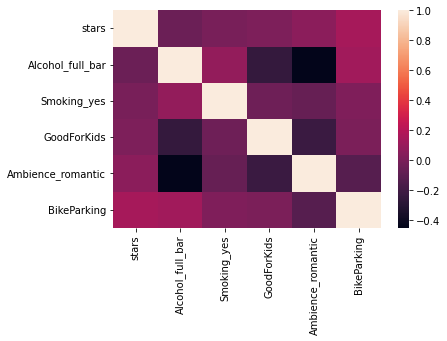

In [128]:
corr_df = business_df[['stars', 'Alcohol_full_bar', 'Smoking_yes', 'GoodForKids', 'Ambience_romantic', 'BikeParking']]
sns.heatmap(corr_df.corr());

### Predictive Modelling

##### Most  represented categories

In [129]:
business_df.iloc[:, 13:648].sum().sort_values(ascending=False).head(10)

Restaurants                  1361
Food                          586
Nightlife                     448
Bars                          400
Shopping                      394
American (Traditional)        226
Automotive                    193
Event Planning & Services     186
Beauty & Spas                 185
American (New)                185
dtype: int64

#### Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [131]:
# just look at one business category
select_df = business_df[business_df['Restaurants'] == 1]
# just look at attribute columns
model_df = select_df[attribute_cols]  # use just attributes not basic data or check-in columns
temp = business_df['is_open']
model_df['is_open'] =  temp # add one basic data column; not sure why this causes error

feature_cols = model_df.columns
X = model_df
y = select_df.stars

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=1)
print(X_train.shape)
print(X_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print('Train RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print('Test RMSE:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('')
print(lr.intercept_)
res = pd.DataFrame({'feature': feature_cols, 'coef': lr.coef_})
print(res.sort_values(by=['coef'], ascending=False))

(1224, 90)
(137, 90)
Train RMSE:
0.7255088766318675
Test RMSE:
0.8194593890183542

4.7473740169466625
                      feature      coef
66              Music_karaoke  0.496341
24                    Corkage  0.470146
13             GoodForDancing  0.433901
31          Ambience_intimate  0.349140
1                      Caters  0.310903
..                        ...       ...
14     BusinessAcceptsBitcoin -0.598925
18          ByAppointmentOnly -0.662925
82   RestaurantsAttire_formal -0.742407
20  RestaurantsCounterService -0.851293
62             Music_no_music -1.030074

[90 rows x 2 columns]


C:\Users\JP\AppData\Local\Temp/ipykernel_24084/158054040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['is_open'] =  temp # add one basic data column; not sure why this causes error


In [132]:
from sklearn.model_selection import KFold, cross_val_score

In [133]:
# just look at one business category
select_df = business_df[business_df['Restaurants'] == 1]
# just look at attribute columns
model_df = select_df[attribute_cols]  # use just attributes not basic data or check-in columns
temp = business_df['is_open']
model_df['is_open'] = temp  # add one basic data column; not sure why this causes error

feature_cols = model_df.columns
X = model_df
y = select_df.stars

lr = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
print('10-fold RMSEs:')
print([np.sqrt(-x) for x in cross_val_scores])
print('CV RMSE:')
print(np.sqrt(-np.mean(cross_val_scores)))  # RMSE is the sqrt of the avg of MSEs
print('Std of CV RMSE:')
print(np.std(cross_val_scores))

10-fold RMSEs:
[17701460.025990564, 0.8351143106781433, 0.8131913915737294, 0.7835011843297881, 0.7244275433373627, 0.8192297802128972, 0.6965177466891106, 0.7079971261959803, 0.7324645966782336, 0.7799145721264588]
CV RMSE:
5597693.159255401
Std of CV RMSE:
94002506115522.39


C:\Users\JP\AppData\Local\Temp/ipykernel_24084/1252074764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['is_open'] = temp  # add one basic data column; not sure why this causes error


In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict

In [135]:
pf = PolynomialFeatures(degree=2,interaction_only=True)
X_pf = pf.fit_transform(X)  # only apply to attribute columns
print(X.shape)
print(X_pf.shape)

lr2 = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
pf_cross_val_scores = cross_val_score(lr2, X_pf, y, scoring='neg_mean_squared_error', cv=kfold)

pf_cross_val_predicts = cross_val_predict(lr2, X_pf, y, cv=kfold)
print(pf_cross_val_predicts[:20])

print('10-fold RMSEs:')
print([np.sqrt(-x) for x in pf_cross_val_scores])
print('CV RMSE:')
print(np.sqrt(-np.mean(pf_cross_val_scores)))  # RMSE is the sqrt of the avg of MSEs
print('Std of CV RMSE:')
print(np.std(pf_cross_val_scores))

(1361, 90)
(1361, 4096)
[ 2.68084717e+00 -5.01892090e-01  5.90995257e+10 -3.47115801e+09
  4.61621094e+00 -7.47558594e-01  2.65308813e+07  4.19726562e+00
 -2.65149498e+00 -5.55007388e+08  5.88497942e+08 -3.75043959e+10
  9.68579102e+00 -2.86213907e+09  9.42514038e+00  1.15199084e+09
  8.11645508e+00  1.97736359e+00  5.79833984e+00  5.49663937e+10]
10-fold RMSEs:
[59905122899.090324, 30264035575.040726, 630621009.9479679, 5498626213.518169, 31154873762.13085, 8266836195.892298, 109851122530.8386, 32883202414.703243, 229868919.04362085, 11196715832.714392]
CV RMSE:
43414431148.2378
Std of CV RMSE:
3.5488525187642467e+21


In [136]:
from sklearn.linear_model import RidgeCV

In [137]:
ridge = RidgeCV(store_cv_values=True)
ridge.fit(X, y)

ridge_MSEs = ridge.cv_values_
print('Ridge CV RMSE:')
print(np.sqrt(np.mean(ridge_MSEs)))

# try on expanded polynomial features
ridge_pf = RidgeCV(store_cv_values=True)
ridge_pf.fit(X_pf, y)

ridge_pf_MSEs = ridge_pf.cv_values_
print('Ridge PF CV RMSE:')
print(np.sqrt(np.mean(ridge_pf_MSEs)))

Ridge CV RMSE:
0.7658127515535782
Ridge PF CV RMSE:
1.1593978839584569


### Decision tree regressor

In [138]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [139]:
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [140]:
# use business attributes to predict star rating, same as above
rg_X_train, rg_X_test, rg_y_train, rg_y_test = train_test_split(X, y, test_size=.2, random_state=1)
features = [x.encode('utf-8') for x in model_df.columns.values]

rg = DecisionTreeRegressor(max_depth=3)
rg.fit(rg_X_train, rg_y_train)
print('RMSE:')
print(np.sqrt(metrics.mean_squared_error(rg_y_test, rg.predict(rg_X_test))))
print('')



RMSE:
0.8140332063802397



In [141]:
# most important features of the decision tree regressor
pd.DataFrame({'feature': model_df.columns.values, 'importance': rg.feature_importances_}).sort_values(by='importance', ascending=False).head()

,feature,importance
4,BikeParking,0.456675
19,DriveThru,0.207412
1,Caters,0.132761
77,NoiseLevel_loud,0.077685
26,BusinessParking_street,0.064889


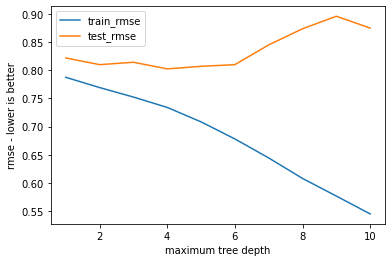

In [142]:
depths = range(1,11)
train_rmse, test_rmse = [],[]
for depth in depths:
    decision_tree = DecisionTreeRegressor(max_depth=depth, random_state=1)
    decision_tree.fit(rg_X_train, rg_y_train)
    curr_train_rmse = np.sqrt(metrics.mean_squared_error(rg_y_train, decision_tree.predict(rg_X_train)))
    curr_test_rmse = np.sqrt(metrics.mean_squared_error(rg_y_test, decision_tree.predict(rg_X_test)))
    train_rmse.append(curr_train_rmse)
    test_rmse.append(curr_test_rmse)
sns.mpl.pyplot.plot(depths,train_rmse,label='train_rmse')
sns.mpl.pyplot.plot(depths,test_rmse,label='test_rmse')
sns.mpl.pyplot.xlabel("maximum tree depth")
sns.mpl.pyplot.ylabel("rmse - lower is better")
sns.mpl.pyplot.legend();

In [143]:
from six import StringIO

In [144]:
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [145]:
# use business attributes to predict star rating, same as above
feature_cols = [x.encode('utf-8') for x in model_df.columns.values]
X = model_df
y = select_df.stars

rg = DecisionTreeRegressor(max_depth=3, max_features=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(rg, X, y, scoring='neg_mean_squared_error', cv=kfold)
print('10-fold RMSEs:')
print([np.sqrt(-x) for x in cross_val_scores])
print('CV RMSE:')
print(np.sqrt(-np.mean(cross_val_scores)))  # RMSE is the sqrt of the avg of MSEs
print('Std of CV RMSE:')
print(np.std(cross_val_scores))



10-fold RMSEs:
[0.7758433472406159, 0.8634693198858562, 0.8982204972244597, 0.8059626621678881, 0.7603678454751105, 0.779441975743879, 0.7370626117460521, 0.7534005103728022, 0.7218653015702184, 0.7812374160736661]
CV RMSE:
0.7894220753701398
Std of CV RMSE:
0.08495892410805307


In [146]:
from sklearn.model_selection import GridSearchCV

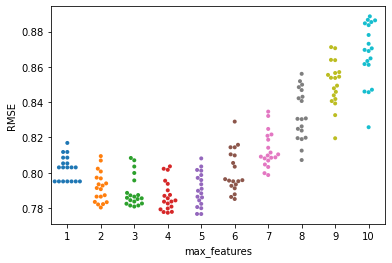

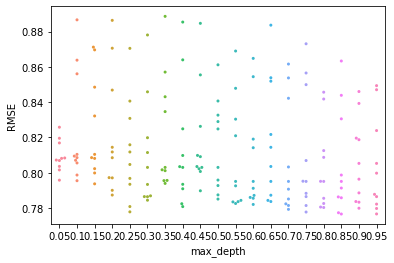

In [147]:
# grid search to find best parameters
rg_grid = DecisionTreeRegressor(random_state=1)
max_depth_range = range(1, 11)
max_features_range = [x/20.0 for x in range(1, 20)]
param_grid = dict(max_depth=max_depth_range, max_features=max_features_range)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(rg_grid, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, y)
# print(grid.cv_results_['mean_test_score'])

# print(grid.cv_results_['params'])

tree_model = grid.best_estimator_
# print('Best RMSE and parameters:')
# print(np.sqrt(-grid.best_score_), grid.best_params_)
# for mean, param in zip(grid.cv_results_['mean_test_score'], grid.cv_results_['params']):
#     print(mean, param)

scores = np.sqrt([-x for x in grid.cv_results_['mean_test_score']])  # convert to RMSE
#print(grid.cv_results_['params'])
max_f = [x['max_depth'] for x in grid.cv_results_['params']]
max_d = [x['max_features'] for x in grid.cv_results_['params']]

rg_grid_results = pd.DataFrame({'RMSE': scores,
                                'max_features': max_f,
                                'max_depth': max_d})

# plot the results
sns.swarmplot(x='max_features', y='RMSE', data=rg_grid_results,s = 4)
plt.show()
f2 = sns.swarmplot(x='max_depth', y='RMSE', data=rg_grid_results,s =3)
plt.show()

In [148]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR

  models      RMSE
2  Lasso  0.818151


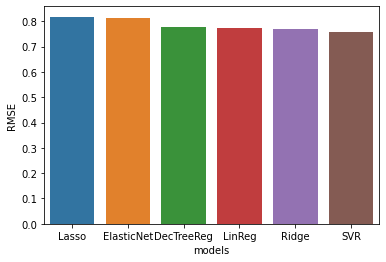

In [149]:
# GridSearch to see if optimizing the parameters will improve (lower) the RMSE
reg_models = [('LinReg', LinearRegression(), {'normalize': [True, False]}),
              ('DecTreeReg', DecisionTreeRegressor(), {'max_depth': range(2, 10, 2), 'max_features': [0.25, 0.5, 0.75, 1.0]}),
              ('Lasso', Lasso(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('Ridge', Ridge(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('ElasticNet', ElasticNet(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('SVR', SVR(), {'C': [1e0, 1e1, 1e2, 1e3], 'gamma': np.logspace(-2, 2, 5)})]

names = []
params = []
results = []
for name, model, param in reg_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    reg_grid = GridSearchCV(model, param, cv=kfold, scoring='neg_mean_squared_error')
    reg_grid.fit(X, y)
    # just keep the results using the best parameters
    best_model = reg_grid.best_estimator_
    names.append(name)
    params.append(reg_grid.best_params_)
    results.append(np.sqrt(-reg_grid.best_score_))  # convert to RMSE

result_df = pd.DataFrame({'models': names, 'results': results})
result_df.columns = ['models', 'RMSE']
result_df.sort_values(by='RMSE', ascending=False, inplace=True)
print(result_df.head(1))

# plot results
sns.barplot(x='models', y='RMSE', data=result_df);

In [150]:
result_df

,models,RMSE
2,Lasso,0.818151
4,ElasticNet,0.813629
1,DecTreeReg,0.775643
0,LinReg,0.773685
3,Ridge,0.770039
5,SVR,0.759424
